In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl

In [2]:
print(np.__version__)
print(pd.__version__)
print(sl.__version__)

1.26.4
2.2.2
1.5.2


In [3]:
df = pd.read_csv("reglin_1.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


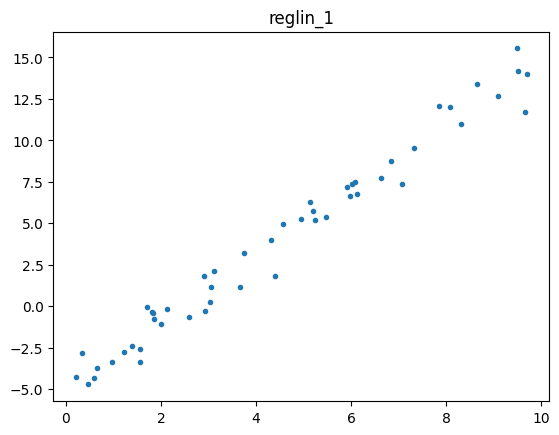

In [5]:
plt.plot(df['x'], df['y'], '.');
plt.title('reglin_1');

In [6]:
n = len(df)
Sx = df['x'].sum()
Sy = df['y'].sum()
Sxy = (df['x'] * df['y']).sum()
# Sxy = df['x'].dot(df['y'])
Sx2 = (df['x']**2).sum()
# Sx2 = np.square(df['x']).sum()
# Sx2 = df['x'].dot(df['x'])

In [7]:
W = n * Sx2 - Sx**2
Wa = n * Sxy - Sx * Sy
Wb = Sx2 * Sy - Sx * Sxy

In [8]:
a = Wa/W
b = Wb/W
a, b

(1.9776566004073706, -4.9033107255226405)

In [9]:
xl = np.linspace(-0.5, 10.5, 500)
yl = a*xl + b

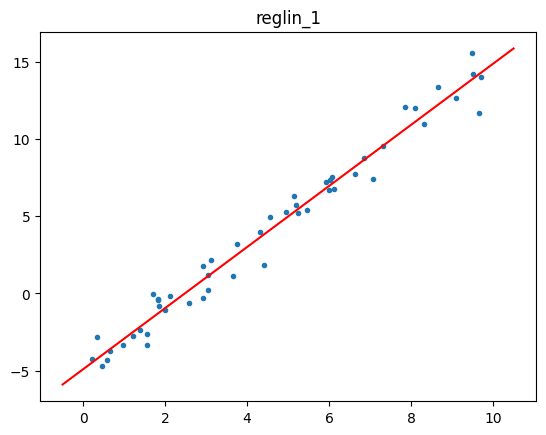

In [10]:
plt.plot(df['x'], df['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_1');

In [11]:
rss = np.square(df['y'] - a*df['x'] - b).sum()
tss = np.square(df['y'] - df['y'].mean()).sum()
r2 = 1.0 - rss/tss
np.sqrt(rss/tss), r2

(0.1583855783332939, 0.9749140085760281)

In [12]:
df2 = pd.read_csv("reglin_2.csv")

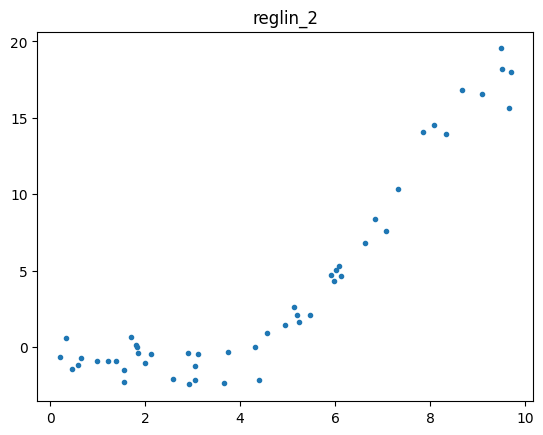

In [13]:
plt.plot(df2['x'], df2['y'], '.');
plt.title('reglin_2');

In [14]:
n = len(df2)
Sx = df2['x'].sum()
Sy = df2['y'].sum()
Sxy = (df2['x'] * df2['y']).sum()
Sx2 = (df2['x']**2).sum()
W = n * Sx2 - Sx**2
Wa = n * Sxy - Sx * Sy
Wb = Sx2 * Sy - Sx * Sxy
a = Wa/W
b = Wb/W
a, b

(2.0748983653297897, -5.440525853813019)

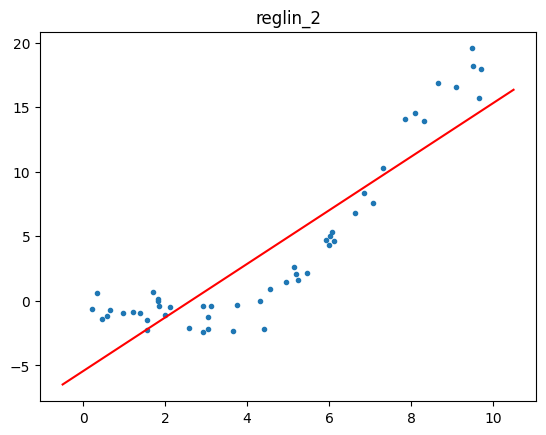

In [15]:
xl = np.linspace(-0.5, 10.5, 500)
yl = a*xl + b
plt.plot(df2['x'], df2['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_2');

In [16]:
rss = np.square(df2['y'] - a*df2['x'] - b).sum()
tss = np.square(df2['y'] - df2['y'].mean()).sum()
r2 = 1.0 - rss/tss
np.sqrt(rss/tss), r2

(0.43771393862999736, 0.8084065079290149)

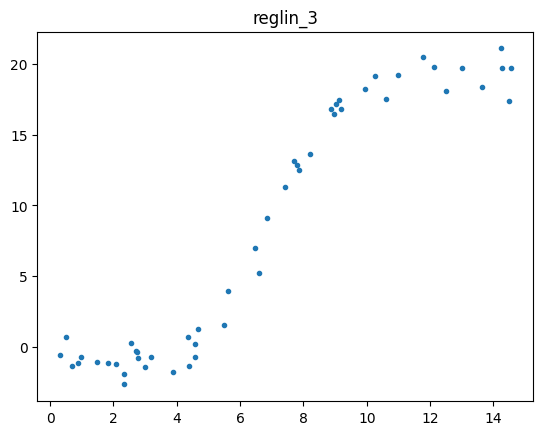

In [17]:
df3 = pd.read_csv("reglin_3.csv")
plt.plot(df3['x'], df3['y'], '.');
plt.title('reglin_3');

In [18]:
n = len(df3)
Sx = df3['x'].sum()
Sy = df3['y'].sum()
Sxy = (df3['x'] * df3['y']).sum()
Sx2 = (df3['x']**2).sum()
W = n * Sx2 - Sx**2
Wa = n * Sxy - Sx * Sy
Wb = Sx2 * Sy - Sx * Sxy
a = Wa/W
b = Wb/W
a, b

(1.9355461190467886, -4.79525082790976)

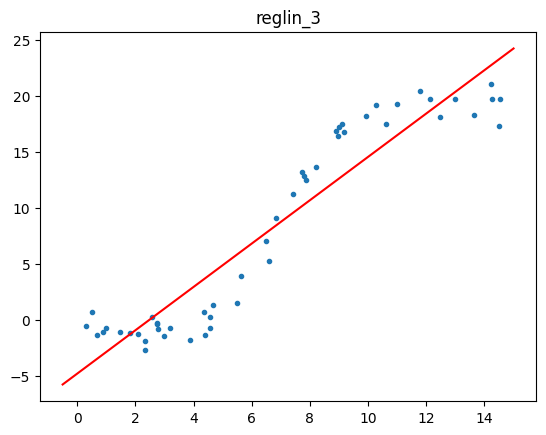

In [19]:
xl = np.linspace(-0.5, 15, 500)
yl = a*xl + b
plt.plot(df3['x'], df3['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_3');

In [20]:
rss = np.square(df3['y'] - a*df3['x'] - b).sum()
tss = np.square(df3['y'] - df3['y'].mean()).sum()
r2 = 1.0 - rss/tss
np.sqrt(rss/tss), r2

(0.33780053114122854, 0.8858908011607038)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(df[['x']], df['y'])

LinearRegression()

In [23]:
xl = np.linspace(-0.5, 10.5, 500)
# xl[:, np.newaxis].shape
xl.reshape(-1, 1).shape
# fit() and predict() both require X as a matrix where each row is one sample, and columns are values

(500, 1)

In [24]:
yl = model.predict(pd.DataFrame(xl.reshape(-1, 1), columns=['x']))
yl.shape

(500,)

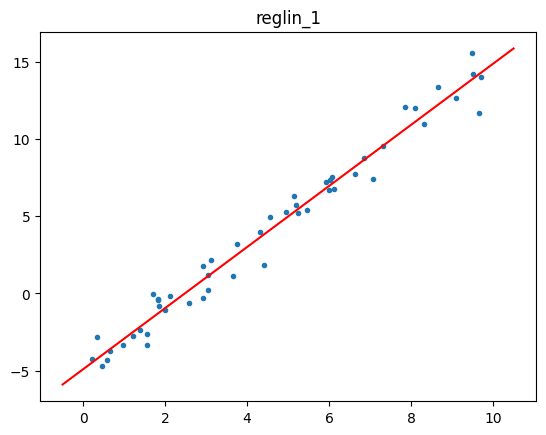

In [25]:
plt.plot(df['x'], df['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_1');

In [26]:
model.coef_, model.intercept_

(array([1.9776566]), -4.903310725522644)

In [27]:
model.score(df[['x']], df['y'])

0.9749140085760281

In [28]:
model = LinearRegression()
model.fit(df2[['x']], df2['y'])
xl = np.linspace(-0.5, 11.5, 500)
xl.reshape(-1, 1).shape
yl = model.predict(pd.DataFrame(xl.reshape(-1, 1), columns=['x']))

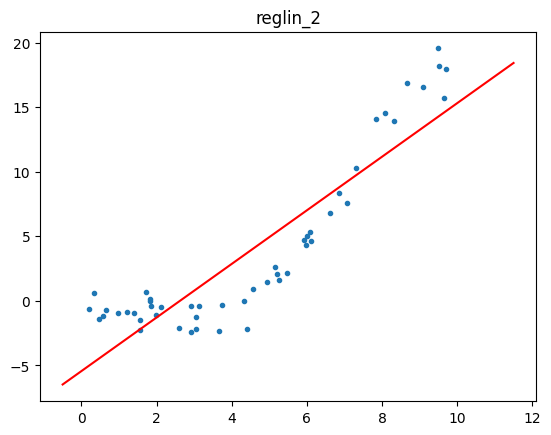

In [29]:
plt.plot(df2['x'], df2['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_2');

In [30]:
model.score(df2[['x']], df2['y'])

0.8084065079290149

In [31]:
model = LinearRegression()
model.fit(df3[['x']], df3['y'])
xl = np.linspace(-0.5, 15, 500)
xl.reshape(-1, 1).shape =
yl = model.predict(pd.DataFrame(xl.reshape(-1, 1), columns=['x']))

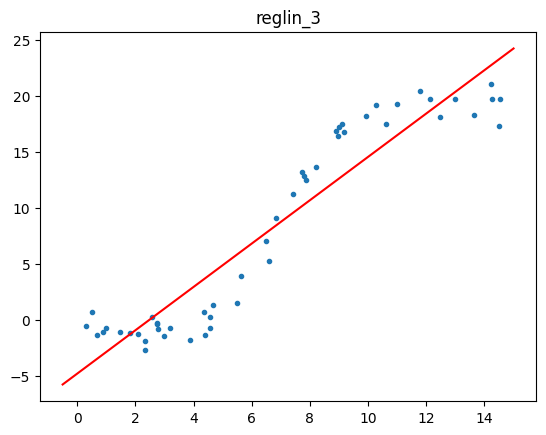

In [32]:
plt.plot(df3['x'], df3['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_3');

In [33]:
model.score(df3[['x']], df3['y'])

0.8858908011607038

In [40]:
# Create new column:
df2['x2'] = np.square(df2['x'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
 2   x2      50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [41]:
model2 = LinearRegression()
model2.fit(df2[['x', 'x2']], df2['y'])

LinearRegression()

In [44]:
model2.coef_, model2.intercept_

(array([-1.34087741,  0.35020357]), -0.03661753964314585)

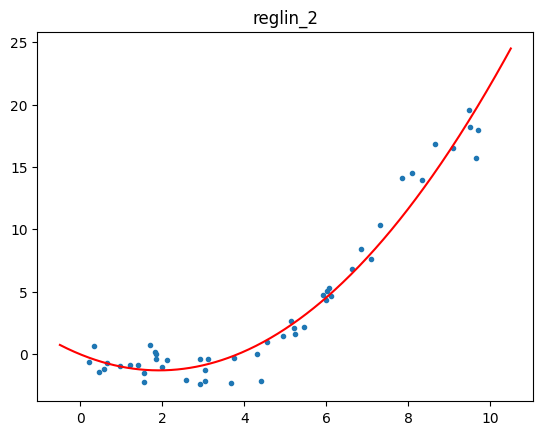

In [43]:
xl = np.linspace(-0.5, 10.5, 500)
# Manual calculation
yl = model2.coef_[0]*xl + model2.coef_[1]*xl**2 + model2.intercept_
plt.plot(df2['x'], df2['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_2');

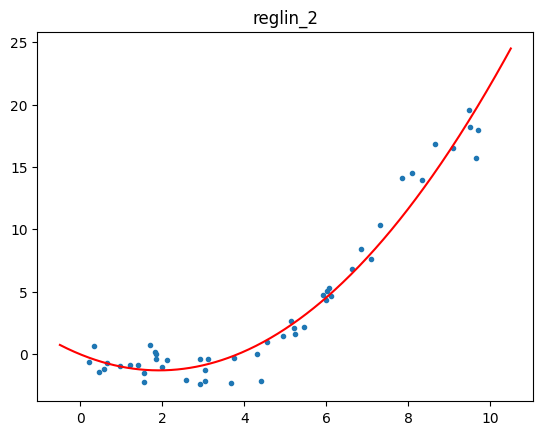

In [51]:
# Automatic calculation
yl = model2.predict(pd.DataFrame({'x':xl, 'x2':np.square(xl)}))
plt.plot(df2['x'], df2['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_2');

In [52]:
model2.score(df2[['x', 'x2']], df2['y'])

0.9626730764178592

In [58]:
df3['x2'] = np.square(df3['x'])
df3['x3'] = df3['x2'] * df3['x']
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
 2   x2      50 non-null     float64
 3   x3      50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [59]:
model3 = LinearRegression()
model3.fit(df3[['x', 'x2', 'x3']], df3['y'])
model3.coef_, model3.intercept_

(array([-3.33369335,  0.92623845, -0.04260231]), 1.427737891675216)

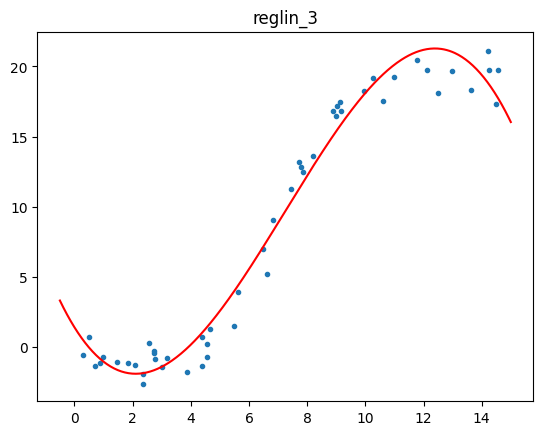

In [60]:
xl = np.linspace(-0.5, 15, 500)
yl = model3.predict(pd.DataFrame({'x':xl, 'x2':np.square(xl), 'x3':np.square(xl) * xl}))
plt.plot(df3['x'], df3['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_3');

In [61]:
model3.score(df3[['x', 'x2', 'x3']], df3['y'])

0.9764691559679861

In [64]:
# PREPROCESSING
from sklearn.preprocessing import PolynomialFeatures

In [67]:
# FOR REGLIN 2
pf = PolynomialFeatures(degree=2, include_bias=False)
x_new = pf.fit_transform(df2[['x']])
df2_new = pd.DataFrame(x_new, columns=['x', 'x2'])
df2_new['y'] = df2['y']
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   x2      50 non-null     float64
 2   y       50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [68]:
# FOR REGLIN 3
pf = PolynomialFeatures(degree=3, include_bias=False)
x_new = pf.fit_transform(df3[['x']])
df3_new = pd.DataFrame(x_new, columns=['x', 'x2', 'x3'])
df3_new['y'] = df3['y']
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   x2      50 non-null     float64
 2   x3      50 non-null     float64
 3   y       50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [69]:
# FOR REGLIN (higher degrees)
pf = PolynomialFeatures(degree=10, include_bias=False)
x_new = pf.fit_transform(df[['x']])
df_new = pd.DataFrame(x_new, columns=['x', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df_new['y'] = df['y']

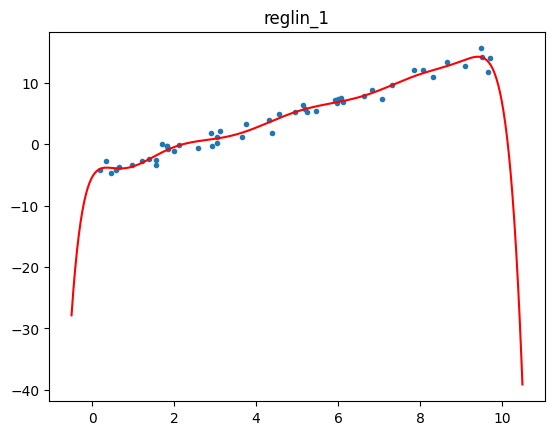

In [72]:
model10 = LinearRegression()
model10.fit(df_new[['x', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']], df_new['y'])
xl = np.linspace(-0.5, 10.5, 500)
xl_s = []
for i in range(10):
  xl_s.append(xl ** (i+1))

yl = model10.predict(pd.DataFrame({'x':xl_s[0], 'x2':xl_s[1], 'x3':xl_s[2], 'x4':xl_s[3], 'x5':xl_s[4], 'x6':xl_s[5], 'x7':xl_s[6], 'x8':xl_s[7], 'x9':xl_s[8], 'x10':xl_s[9]}))
plt.plot(df['x'], df['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_1');

In [74]:
model10.score(df_new[['x', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']], df_new['y'])

0.9791697745862711

In [75]:
pf = PolynomialFeatures(degree=10, include_bias=False)
x_new = pf.fit_transform(df2[['x']])
df2_new = pd.DataFrame(x_new, columns=['x', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df2_new['y'] = df2['y']

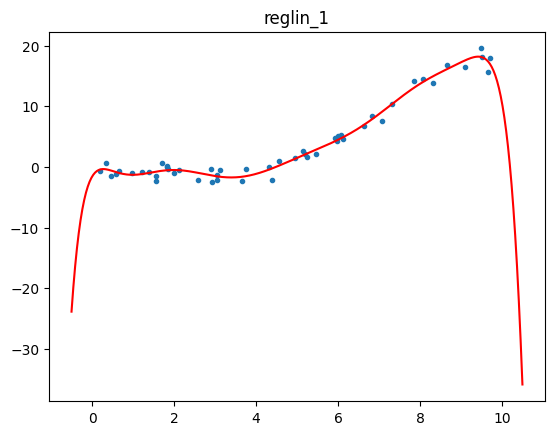

In [76]:
model10 = LinearRegression()
model10.fit(df2_new[['x', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']], df2_new['y'])
xl = np.linspace(-0.5, 10.5, 500)
xl_s = []
for i in range(10):
  xl_s.append(xl ** (i+1))

yl = model10.predict(pd.DataFrame({'x':xl_s[0], 'x2':xl_s[1], 'x3':xl_s[2], 'x4':xl_s[3], 'x5':xl_s[4], 'x6':xl_s[5], 'x7':xl_s[6], 'x8':xl_s[7], 'x9':xl_s[8], 'x10':xl_s[9]}))
plt.plot(df2['x'], df2['y'], '.');
plt.plot(xl, yl, 'r-');
plt.title('reglin_1');

In [78]:
model10.score(df2_new[['x', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']], df2_new['y'])

0.9843084417504377

In [79]:
# NEW DATA SET
x1 = 20*np.random.random(50)
x2 = 10*np.random.random(50)
y = 2*x1 - 3*x2 + 5 + 3*np.random.randn(50)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

In [80]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1', y='x2', z="y")
fig.update_layout(scene_aspectmode='cube')
fig.show()

In [ ]:
# PD: Regresja liniowa dla powyższych danych!